![image_2.png](./img/image_2.png)





## Summary

* #### [Introducción](#introduccion)
* #### [Hipotesis](#hipotesis)
* #### [Procedimiento](#procedimiento)
    * #### [Extracción](#extraccion)
    * #### [Limpieza de datos (paso 1)](#limpieza)
    * #### [Unificación de datos](#unificacion)
    * #### [Limpieza de datos (paso 2)](#limpieza2)
* #### [Inicio del análisis](#analisis)
    * #### [Cardinalidad y Tipo de variables](#cardinalidad)

# **Análisis exploratorio de Datos (EDA)**

### Introduccion <a id="introduccion"></a>

## México y la migración ¿Cuáles son sus causas?

¿Depende de la causa de migración la razón por la cuál un mexicano migra a los Estados Unidos Américanos o a otros países? 

**Hipótesis a contrastar**: Se asume que la causa de migración determina las razones por la cuales los mexicanos migran a los Estados Unidos Américanos u a otros países. <a id="hipotesis"></a>









### Procedimiento <a id="procedimiento"></a>

Como primer paso se importan las librerias que se necesitarán para poder realizar el anális exploratorio de datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import plotly.express as px
import os.path 
import sqlite3

En esta sección leeremos los archivos que necesitaremos para hacer tal análisis

>En esta parte nos enfrentamoss a dificultades para poder acceder al archivo puesto que nos marca un error diciendo que el archivo no se puede encontrar, 
por lo tanto se ha revisado en stack overflow y encontrado una solución que ha funcionado con agreagr la letra r al incio
>> El siguiente reto al que nos encontramos es que el archivo en excel esta bloqueado, así que no podemos ajustar desde el excel directamente, por lo que tendrémos que renombrar las columnas usando métodos de pandas

### Extracción de datos <a id="extraccion"></a>

In [2]:

df_INEGI_Yr2020_07 = pd.read_excel(r"/Users/stefa/REPO_PRUEBA/EDA_Proyecto/src/data/cpv2020.xlsx",sheet_name="07",skiprows=[0,1,2,3,4,5]) #se utiliza letra r para leer el archivo
df_INEGI_Yr2020_07.head(5)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Buscar trabajo,Cambio u oferta de trabajo,Reunirse con la familia,Se casó o unió,Estudiar,Por inseguridad delictiva o violencia,Por desastres naturales,Lo deportaron,Otra causa,No especificado
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Estados Unidos MexicanosTotalTotal,Estados Unidos Mexicanos,Total,Total,6888490.0,1129177.0,855435.0,2515611.0,636148.0,463170.0,274158.0,24742.0,41390.0,860165.0,88494.0
2,Estados Unidos Mexicanos05-09 añosTotal,Estados Unidos Mexicanos,Total,05-09 años,624339.0,0.0,0.0,479214.0,0.0,42379.0,24816.0,1760.0,587.0,67922.0,7661.0
3,Estados Unidos Mexicanos10-14 añosTotal,Estados Unidos Mexicanos,Total,10-14 años,542634.0,6758.0,7067.0,385222.0,1102.0,58274.0,26181.0,1826.0,630.0,50036.0,5538.0
4,Estados Unidos Mexicanos15-19 añosTotal,Estados Unidos Mexicanos,Total,15-19 años,595630.0,73319.0,22189.0,270949.0,41917.0,117612.0,23439.0,1543.0,482.0,37946.0,6234.0


>En esta parte nos encontramos un nuevo reto ya que las filas con los títulos estaban concatenadas, así que parecía que necesitaba poner un salto de carro, al final
buscando en las librerías y Stack overflow he visto que con el inplace funcionaba el cambio de nombre

In [3]:
df_INEGI_Yr2020_07.rename(columns ={"Unnamed: 0": "Unicode", "Unnamed: 1":"Entidad Federativa de residencia actual","Unnamed: 2":"Género","Unnamed: 3": "Grupos quinquenales de edad","Unnamed: 4" : "Población de 5 años y más migrante"},inplace=True)
df_INEGI_Yr2020_07.head(5) #Cuando se imprime se puede notar que las columnas están renombradas

,Unicode,Entidad Federativa de residencia actual,Género,Grupos quinquenales de edad,Población de 5 años y más migrante,Buscar trabajo,Cambio u oferta de trabajo,Reunirse con la familia,Se casó o unió,Estudiar,Por inseguridad delictiva o violencia,Por desastres naturales,Lo deportaron,Otra causa,No especificado
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Estados Unidos MexicanosTotalTotal,Estados Unidos Mexicanos,Total,Total,6888490.0,1129177.0,855435.0,2515611.0,636148.0,463170.0,274158.0,24742.0,41390.0,860165.0,88494.0
2,Estados Unidos Mexicanos05-09 añosTotal,Estados Unidos Mexicanos,Total,05-09 años,624339.0,0.0,0.0,479214.0,0.0,42379.0,24816.0,1760.0,587.0,67922.0,7661.0
3,Estados Unidos Mexicanos10-14 añosTotal,Estados Unidos Mexicanos,Total,10-14 años,542634.0,6758.0,7067.0,385222.0,1102.0,58274.0,26181.0,1826.0,630.0,50036.0,5538.0
4,Estados Unidos Mexicanos15-19 añosTotal,Estados Unidos Mexicanos,Total,15-19 años,595630.0,73319.0,22189.0,270949.0,41917.0,117612.0,23439.0,1543.0,482.0,37946.0,6234.0


>El siguiente paso es traer el Sheet número 5, el cual tiene los datos de lugares a los que los mexicanos han migrado.

In [4]:
df_INEGI_Yr2020_5 = pd.read_excel(r"/Users/stefa/REPO_PRUEBA/EDA_Proyecto/src/data/cpv2020.xlsx",sheet_name="05",skiprows=[0,1,2,3,4,5],usecols="A:D,J:N") #Se observa que se traen las columnas que únicamente necesitamos para nuestro análisis
df_INEGI_Yr2020_5.head(5)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,En otra entidad o país,Unnamed: 10,Unnamed: 11,Unnamed: 12,No especificado
0,NaN,NaN,NaN,NaN,Total,En otra entidad,En los Estados Unidos de América,En otro país,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Estados Unidos MexicanosTotalTotal,Estados Unidos Mexicanos,Total,Total,4357929,3807844,374155,175930,259750.0
3,Estados Unidos Mexicanos05-09 añosTotal,Estados Unidos Mexicanos,Total,05-09 años,385509,353149,20662,11698,13876.0
4,Estados Unidos Mexicanos10-14 añosTotal,Estados Unidos Mexicanos,Total,10-14 años,334988,304784,20721,9483,8895.0


>En este apartado se renombran las columnas puesto que el Excel esta bloqueado y no se pueden modificar manualmente en el excel, por lo cual se ha tenido que utilizar las herramientas de pandas para nombrar las columnas como en la tabla anterior

In [5]:

df_INEGI_Yr2020_5.rename(columns ={"Unnamed: 0":"Unicode","Unnamed: 1":"Entidad Federativa de residencia actual","Unnamed: 2":"Género","Unnamed: 3": "Grupos quinquenales de edad","En otra entidad del país":"Total en otra entidad del país","Unnamed: 10":"En otra entidad","Unnamed: 11":"En los Estados Unidos de América","Unnamed: 12":"En otro país"},inplace=True)
df_INEGI_Yr2020_5 #se renombran las columnas utilizando pandas

,Unicode,Entidad Federativa de residencia actual,Género,Grupos quinquenales de edad,En otra entidad o país,En otra entidad,En los Estados Unidos de América,En otro país,No especificado
0,NaN,NaN,NaN,NaN,Total,En otra entidad,En los Estados Unidos de América,En otro país,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Estados Unidos MexicanosTotalTotal,Estados Unidos Mexicanos,Total,Total,4357929,3807844,374155,175930,259750.0
3,Estados Unidos Mexicanos05-09 añosTotal,Estados Unidos Mexicanos,Total,05-09 años,385509,353149,20662,11698,13876.0
4,Estados Unidos Mexicanos10-14 añosTotal,Estados Unidos Mexicanos,Total,10-14 años,334988,304784,20721,9483,8895.0
...,...,...,...,...,...,...,...,...,...
1779,32 Zacatecas65-69 añosMujeres,32 Zacatecas,Mujeres,65-69 años,387,224,162,1,11.0
1780,32 Zacatecas70-74 añosMujeres,32 Zacatecas,Mujeres,70-74 años,214,130,84,0,12.0
1781,32 Zacatecas75-79 añosMujeres,32 Zacatecas,Mujeres,75-79 años,160,97,63,0,5.0
1782,32 Zacatecas80-84 añosMujeres,32 Zacatecas,Mujeres,80-84 años,85,57,28,0,5.0


### Limpieza de datos (paso 1)  <a id="limpieza"></a>

#### Tabla 07


In [6]:
df_INEGI_Yr2020_07.info() #aunque pareciera que no hay nulos, en la tabla de abajo podemos ver que hay líneas enteras que contienen Nulos, las cuales hay que eliminar

df_INEGI_Yr2020_07.loc[df_INEGI_Yr2020_07 ["Entidad Federativa de residencia actual"].isna()] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1785 entries, 0 to 1784
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unicode                                  1782 non-null   object 
 1   Entidad Federativa de residencia actual  1783 non-null   object 
 2   Género                                   1782 non-null   object 
 3   Grupos quinquenales de edad              1782 non-null   object 
 4   Población de 5 años y más migrante       1782 non-null   float64
 5   Buscar trabajo                           1782 non-null   float64
 6   Cambio u oferta de trabajo               1782 non-null   float64
 7   Reunirse con la familia                  1782 non-null   float64
 8   Se casó o unió                           1782 non-null   float64
 9   Estudiar                                 1782 non-null   float64
 10  Por inseguridad delictiva o violencia    1782 no

,Unicode,Entidad Federativa de residencia actual,Género,Grupos quinquenales de edad,Población de 5 años y más migrante,Buscar trabajo,Cambio u oferta de trabajo,Reunirse con la familia,Se casó o unió,Estudiar,Por inseguridad delictiva o violencia,Por desastres naturales,Lo deportaron,Otra causa,No especificado
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_INEGI_Yr2020_07.drop([0],inplace=True) #Se elimina la primera fila de NaN a través de Index 0
df_INEGI_Yr2020_07.dropna(inplace=True) #Se eliminan los NaN de otras filas
df_INEGI_Yr2020_07.head(5)


,Unicode,Entidad Federativa de residencia actual,Género,Grupos quinquenales de edad,Población de 5 años y más migrante,Buscar trabajo,Cambio u oferta de trabajo,Reunirse con la familia,Se casó o unió,Estudiar,Por inseguridad delictiva o violencia,Por desastres naturales,Lo deportaron,Otra causa,No especificado
1,Estados Unidos MexicanosTotalTotal,Estados Unidos Mexicanos,Total,Total,6888490.0,1129177.0,855435.0,2515611.0,636148.0,463170.0,274158.0,24742.0,41390.0,860165.0,88494.0
2,Estados Unidos Mexicanos05-09 añosTotal,Estados Unidos Mexicanos,Total,05-09 años,624339.0,0.0,0.0,479214.0,0.0,42379.0,24816.0,1760.0,587.0,67922.0,7661.0
3,Estados Unidos Mexicanos10-14 añosTotal,Estados Unidos Mexicanos,Total,10-14 años,542634.0,6758.0,7067.0,385222.0,1102.0,58274.0,26181.0,1826.0,630.0,50036.0,5538.0
4,Estados Unidos Mexicanos15-19 añosTotal,Estados Unidos Mexicanos,Total,15-19 años,595630.0,73319.0,22189.0,270949.0,41917.0,117612.0,23439.0,1543.0,482.0,37946.0,6234.0
5,Estados Unidos Mexicanos20-24 añosTotal,Estados Unidos Mexicanos,Total,20-24 años,864222.0,208504.0,73593.0,203711.0,130552.0,164553.0,20802.0,1394.0,1704.0,49431.0,9978.0


In [8]:
df_INEGI_Yr2020_07.loc[df_INEGI_Yr2020_07 ["Entidad Federativa de residencia actual"].isna()] #Corroboramos que no haya más Nulos


,Unicode,Entidad Federativa de residencia actual,Género,Grupos quinquenales de edad,Población de 5 años y más migrante,Buscar trabajo,Cambio u oferta de trabajo,Reunirse con la familia,Se casó o unió,Estudiar,Por inseguridad delictiva o violencia,Por desastres naturales,Lo deportaron,Otra causa,No especificado


In [9]:
#mask_drop_GQuin_07 = df_INEGI_Yr2020_07['Grupos quinquenales de edad'] == 'Total' 
''' 27072024 Se elimina el Total de Grupos quinquenales de edad utlizando una máscara ya que el total lo podemos calcular utilizando python
'''
''' 272072024 al continuar con el ejercicio, nos percatamos que las filas de Total las ocuparemos para el Análisis de datos
'''
#df_INEGI_Yr2020_07 = df_INEGI_Yr2020_07 [~mask_drop_GQuin_07]
#df_INEGI_Yr2020_07.head(5)

' 272072024 al continuar con el ejercicio, nos percatamos que las filas de Total las ocuparemos para el Análisis de datos\n'

#### Tabla 05


In [10]:
df_INEGI_Yr2020_5.info() #aunque pareciera que no hay nulos, en la tabla de abajo podemos ver que hay líneas enteras que contienen Nulos, las cuales hay que eliminar

df_INEGI_Yr2020_5.loc[df_INEGI_Yr2020_5 ["Entidad Federativa de residencia actual"].isna()] 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1784 entries, 0 to 1783
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unicode                                  1782 non-null   object 
 1   Entidad Federativa de residencia actual  1782 non-null   object 
 2   Género                                   1782 non-null   object 
 3   Grupos quinquenales de edad              1782 non-null   object 
 4   En otra entidad o país                   1783 non-null   object 
 5   En otra entidad                          1783 non-null   object 
 6   En los Estados Unidos de América         1783 non-null   object 
 7   En otro país                             1783 non-null   object 
 8   No especificado                          1782 non-null   float64
dtypes: float64(1), object(8)
memory usage: 125.6+ KB


,Unicode,Entidad Federativa de residencia actual,Género,Grupos quinquenales de edad,En otra entidad o país,En otra entidad,En los Estados Unidos de América,En otro país,No especificado
0,NaN,NaN,NaN,NaN,Total,En otra entidad,En los Estados Unidos de América,En otro país,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_INEGI_Yr2020_5.drop([0],inplace=True) #Se elimina la primera fila de NaN a través de Index 0
df_INEGI_Yr2020_5.dropna(inplace=True) #Se eliminan los NaN de otras filas
df_INEGI_Yr2020_5.head(5)

,Unicode,Entidad Federativa de residencia actual,Género,Grupos quinquenales de edad,En otra entidad o país,En otra entidad,En los Estados Unidos de América,En otro país,No especificado
2,Estados Unidos MexicanosTotalTotal,Estados Unidos Mexicanos,Total,Total,4357929,3807844,374155,175930,259750.0
3,Estados Unidos Mexicanos05-09 añosTotal,Estados Unidos Mexicanos,Total,05-09 años,385509,353149,20662,11698,13876.0
4,Estados Unidos Mexicanos10-14 añosTotal,Estados Unidos Mexicanos,Total,10-14 años,334988,304784,20721,9483,8895.0
5,Estados Unidos Mexicanos15-19 añosTotal,Estados Unidos Mexicanos,Total,15-19 años,371644,345520,15908,10216,10996.0
6,Estados Unidos Mexicanos20-24 añosTotal,Estados Unidos Mexicanos,Total,20-24 años,553636,515834,19721,18081,26457.0


In [12]:
df_INEGI_Yr2020_5.loc[df_INEGI_Yr2020_5 ["Entidad Federativa de residencia actual"].isna()] #Corroboramos que no haya más Nulos

,Unicode,Entidad Federativa de residencia actual,Género,Grupos quinquenales de edad,En otra entidad o país,En otra entidad,En los Estados Unidos de América,En otro país,No especificado


In [13]:
#mask_drop_GQuin_5 = df_INEGI_Yr2020_5['Grupos quinquenales de edad'] == 'Total' 
'''Se elimina el Total de Grupos quinquenales de edad utlizando una máscara ya que el total lo podemos calcular utilizando python
'''

''' 27072024 Se elimina el Total de Grupos quinquenales de edad utlizando una máscara ya que el total lo podemos calcular utilizando python
'''
''' 272072024 al continuar con el ejercicio, nos percatamos que las filas de Total las ocuparemos para el Análisis de datos
'''
#df_INEGI_Yr2020_5 = df_INEGI_Yr2020_5 [~mask_drop_GQuin_5]
#df_INEGI_Yr2020_5.head(5)

' 272072024 al continuar con el ejercicio, nos percatamos que las filas de Total las ocuparemos para el Análisis de datos\n'

### Unificación de valores de las tablas <a id="unificacion"></a>

*En esta sección hacemos la combinación de las tablas 07 y 5. Sin embargo, podemos ver que se han creados una **segunda limpieza** tendrá que llevarse acabo*

> Antes de continuar con la limpieza se ha observado que las filas han incrementadp de 1683 en cada tabla a 85833 por lo que procedemos a verificar
la solución que se encontró fue crear una nueva columna llamada "Unicode" la cual ayuda a unificar mediante un único valor que tenga como referencia
la *Entidad Federativa de residencia actual* y los *Grupos quinquenales de edad* reduciendo las líneas a 5049 como se aprecia en la tabla de abajo.
>> Nos percatamos que los datos se están combinando de manera equivocada, por lo que procedemos al análisis por lo que se ha pensado en alguna forma de poder asegurarnos que cuando se hace el merge de ambas tablas, los datos se combinen de la misma manera puesto que anteriormente cuando se combinaba una tabla se pegaba con los grupos quinquenales ordenado por grupor y la otra tabla se combinaba pero ordenada por Género. La solución fue agregar manualmente en Excel un Unicode que concatenará Total, Género y Grupos en ambas tablas y con esto en pandas hemos hecho el "sort_values" en la fórmula para combinar las tablas y hemos corroborado que se haya combinado correctamente al filtrar por grupos y ver si los géneros estaban ordenados de la misma manera y los importes de totales ambas tablas coincidian,

In [17]:
#Se combinan ambas tablas ordenadas de la misma forma a través del unicode creado
df_INEGI_merged = df_INEGI_Yr2020_07.sort_values(by="Unicode",ascending=False).merge(df_INEGI_Yr2020_5.sort_values(by="Unicode",ascending=False), how='left',on="Unicode") #Combinación de tablas 07 y 5
df_INEGI_merged.loc[df_INEGI_merged["Grupos quinquenales de edad_x"] == "05-09 años"].head(4) #se utiliza este filtro para verificar que la combinación de datos se ha hecho correctamente


,Unicode,Entidad Federativa de residencia actual_x,Género_x,Grupos quinquenales de edad_x,Población de 5 años y más migrante,Buscar trabajo,Cambio u oferta de trabajo,Reunirse con la familia,Se casó o unió,Estudiar,...,Otra causa,No especificado_x,Entidad Federativa de residencia actual_y,Género_y,Grupos quinquenales de edad_y,En otra entidad o país,En otra entidad,En los Estados Unidos de América,En otro país,No especificado_y
51,Estados Unidos Mexicanos05-09 añosTotal,Estados Unidos Mexicanos,Total,05-09 años,624339.0,0.0,0.0,479214.0,0.0,42379.0,...,67922.0,7661.0,Estados Unidos Mexicanos,Total,05-09 años,385509,353149,20662,11698,13876.0
52,Estados Unidos Mexicanos05-09 añosMujeres,Estados Unidos Mexicanos,Mujeres,05-09 años,308794.0,0.0,0.0,237304.0,0.0,20424.0,...,33695.0,3872.0,Estados Unidos Mexicanos,Mujeres,05-09 años,190687,174955,10118,5614,6851.0
53,Estados Unidos Mexicanos05-09 añosHombres,Estados Unidos Mexicanos,Hombres,05-09 años,315545.0,0.0,0.0,241910.0,0.0,21955.0,...,34227.0,3789.0,Estados Unidos Mexicanos,Hombres,05-09 años,194822,178194,10544,6084,7025.0
105,32 Zacatecas05-09 añosTotal,32 Zacatecas,Total,05-09 años,6576.0,0.0,0.0,5346.0,0.0,372.0,...,563.0,78.0,32 Zacatecas,Total,05-09 años,4311,3678,588,45,132.0


### Limpieza de datos (paso 2)  <a id="limpieza2"></a>

#### Tabla merged

> En este apartado verificamos que no haya NaN 

In [18]:
df_INEGI_merged.columns #Nos ayudamos a visualizar mejor los nombres de las columnas trayendo los headers de las mismas

Index(['Unicode', 'Entidad Federativa de residencia actual_x', 'Género_x',
       'Grupos quinquenales de edad_x', 'Población de 5 años y más migrante',
       'Buscar trabajo', 'Cambio u oferta de trabajo',
       'Reunirse con la familia', 'Se casó o unió', 'Estudiar',
       'Por inseguridad delictiva o violencia', 'Por desastres naturales',
       'Lo deportaron', 'Otra causa', 'No especificado_x',
       'Entidad Federativa de residencia actual_y', 'Género_y',
       'Grupos quinquenales de edad_y', 'En otra entidad o país',
       'En otra entidad', 'En los Estados Unidos de América', 'En otro país',
       'No especificado_y'],
      dtype='object')

In [20]:
df_INEGI_merged.info() #verificamos los nulos
'''Además de verificar nulos podemos que finalmente al combinar las tablas ordenadamente nos da un total de líneas de 1782 que 
contienen ambas, es decir, hemos también eliminado duplicados
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 23 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unicode                                    1782 non-null   object 
 1   Entidad Federativa de residencia actual_x  1782 non-null   object 
 2   Género_x                                   1782 non-null   object 
 3   Grupos quinquenales de edad_x              1782 non-null   object 
 4   Población de 5 años y más migrante         1782 non-null   float64
 5   Buscar trabajo                             1782 non-null   float64
 6   Cambio u oferta de trabajo                 1782 non-null   float64
 7   Reunirse con la familia                    1782 non-null   float64
 8   Se casó o unió                             1782 non-null   float64
 9   Estudiar                                   1782 non-null   float64
 10  Por inseguridad delictiv

'Además de verificar nulos podemos que finalmente al combinar las tablas ordenadamente nos da un total de líneas de 1782 que \ncontienen ambas, es decir, hemos también eliminado duplicados\n'

In [21]:
df_INEGI_merged.dropna(inplace=True) #nos aseguramos que no haya nulos con la fórmula dropna
df_INEGI_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 23 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unicode                                    1782 non-null   object 
 1   Entidad Federativa de residencia actual_x  1782 non-null   object 
 2   Género_x                                   1782 non-null   object 
 3   Grupos quinquenales de edad_x              1782 non-null   object 
 4   Población de 5 años y más migrante         1782 non-null   float64
 5   Buscar trabajo                             1782 non-null   float64
 6   Cambio u oferta de trabajo                 1782 non-null   float64
 7   Reunirse con la familia                    1782 non-null   float64
 8   Se casó o unió                             1782 non-null   float64
 9   Estudiar                                   1782 non-null   float64
 10  Por inseguridad delictiv

In [22]:
df_INEGI_merged.loc[df_INEGI_merged["Entidad Federativa de residencia actual_y"].isna()] #hacemos un random check de nulos a través de la columna "Entidad Federativa de residencia actual"

,Unicode,Entidad Federativa de residencia actual_x,Género_x,Grupos quinquenales de edad_x,Población de 5 años y más migrante,Buscar trabajo,Cambio u oferta de trabajo,Reunirse con la familia,Se casó o unió,Estudiar,...,Otra causa,No especificado_x,Entidad Federativa de residencia actual_y,Género_y,Grupos quinquenales de edad_y,En otra entidad o país,En otra entidad,En los Estados Unidos de América,En otro país,No especificado_y


In [23]:
#En esta parte eliminamos las columnas repetidas para ir dejando nuestra base datos lo más simple y limpia posible

df_INEGI_merged.drop("Grupos quinquenales de edad_y",axis=1,inplace=True) 
df_INEGI_merged.drop("Género_y",axis=1,inplace=True)



In [24]:
df_INEGI_merged.head(1)

,Unicode,Entidad Federativa de residencia actual_x,Género_x,Grupos quinquenales de edad_x,Población de 5 años y más migrante,Buscar trabajo,Cambio u oferta de trabajo,Reunirse con la familia,Se casó o unió,Estudiar,...,Por desastres naturales,Lo deportaron,Otra causa,No especificado_x,Entidad Federativa de residencia actual_y,En otra entidad o país,En otra entidad,En los Estados Unidos de América,En otro país,No especificado_y
0,Estados Unidos MexicanosTotalTotal,Estados Unidos Mexicanos,Total,Total,6888490.0,1129177.0,855435.0,2515611.0,636148.0,463170.0,...,24742.0,41390.0,860165.0,88494.0,Estados Unidos Mexicanos,4357929,3807844,374155,175930,259750.0


In [25]:
'''Se crea una nueva columna para igualar los datos referentes a las causas de migración vs lugar de residencia, la diferencia entre ambos totales 
se asigna en la nueva columna de datos no especificados de aquel Total que tuvo menos datos que en este caso es el lugar de residencia
'''

df_INEGI_merged ["No_especificado_lugar_residencia"] = (df_INEGI_merged["Población de 5 años y más migrante"] - df_INEGI_merged ["En otra entidad o país"])


In [26]:
#calineamos el total de población de la categoría de "causas de la migración" en la categoría "Residen en otro lugar"
df_INEGI_merged ["Total_residen_en_otro_lugar"] = (df_INEGI_merged["En otra entidad o país"] + df_INEGI_merged ["No_especificado_lugar_residencia"])

In [27]:
df_INEGI_merged.drop("En otra entidad o país",axis=1,inplace=True)  #Se elimina el total que estaba incompleto

*Vemos que ahora tanto el total de Poblacion de 5 años que se refiere al total de causas de migración como el total reside en otro lugar es exactamente el mismo*

In [28]:
df_INEGI_merged.head(1) 


,Unicode,Entidad Federativa de residencia actual_x,Género_x,Grupos quinquenales de edad_x,Población de 5 años y más migrante,Buscar trabajo,Cambio u oferta de trabajo,Reunirse con la familia,Se casó o unió,Estudiar,...,Lo deportaron,Otra causa,No especificado_x,Entidad Federativa de residencia actual_y,En otra entidad,En los Estados Unidos de América,En otro país,No especificado_y,No_especificado_lugar_residencia,Total_residen_en_otro_lugar
0,Estados Unidos MexicanosTotalTotal,Estados Unidos Mexicanos,Total,Total,6888490.0,1129177.0,855435.0,2515611.0,636148.0,463170.0,...,41390.0,860165.0,88494.0,Estados Unidos Mexicanos,3807844,374155,175930,259750.0,2530561.0,6888490.0


> Incialmente se pensó que se podría unificar los No especificados e igualarlos en el total más grande que en este caso era el 
del total de la población, pero al tratar de comenzar con el análisis, nos damos cuenta que necesitamos el total por categoría para poder hacer comparativas que en este caso son:  

* Categoría 1 - Causas de la migración
> 
> 
* categoría 2 - Lugar de residencia

In [25]:
#df_INEGI_merged.drop("No especificado_x",axis=1,inplace=True)


*Sin embargo al continuar con la limpieza y renombrando las columnas, al alinear el n. total de población para el total de residen en otro lugar y la diferencia ponerla en una nueva columna llamada No especificado lugar de residencia, vemos que la columna No especificado_y se puede eliminar ya. Así mismo hemos identificado que la columna Entidad Federativa de residencia actual_y estaba duplicada así que la eliminamos*

In [29]:
df_INEGI_merged.drop("No especificado_y",axis=1,inplace=True)
df_INEGI_merged.drop("Entidad Federativa de residencia actual_y",axis=1,inplace=True)


*En este apartado vamos a renombrar las columnas para poder identificarlas con más facilidad*

In [30]:
df_INEGI_merged.columns

Index(['Unicode', 'Entidad Federativa de residencia actual_x', 'Género_x',
       'Grupos quinquenales de edad_x', 'Población de 5 años y más migrante',
       'Buscar trabajo', 'Cambio u oferta de trabajo',
       'Reunirse con la familia', 'Se casó o unió', 'Estudiar',
       'Por inseguridad delictiva o violencia', 'Por desastres naturales',
       'Lo deportaron', 'Otra causa', 'No especificado_x', 'En otra entidad',
       'En los Estados Unidos de América', 'En otro país',
       'No_especificado_lugar_residencia', 'Total_residen_en_otro_lugar'],
      dtype='object')

In [31]:

df_INEGI_merged.rename(columns ={"Entidad Federativa de residencia actual_x":"Entidad_Federativa","Género_x":"Género","Grupos quinquenales de edad_x":"Grupos_de_edad","Población de 5 años y más migrante": "Total_Causas_Migración","En otra entidad o país":"Total_residen_en_otro_lugar","No especificado_x":"No_especificado_causas"},inplace=True)
df_INEGI_merged.head(3) #se renombran las columnas utilizando pandas

,Unicode,Entidad_Federativa,Género,Grupos_de_edad,Total_Causas_Migración,Buscar trabajo,Cambio u oferta de trabajo,Reunirse con la familia,Se casó o unió,Estudiar,Por inseguridad delictiva o violencia,Por desastres naturales,Lo deportaron,Otra causa,No_especificado_causas,En otra entidad,En los Estados Unidos de América,En otro país,No_especificado_lugar_residencia,Total_residen_en_otro_lugar
0,Estados Unidos MexicanosTotalTotal,Estados Unidos Mexicanos,Total,Total,6888490.0,1129177.0,855435.0,2515611.0,636148.0,463170.0,274158.0,24742.0,41390.0,860165.0,88494.0,3807844,374155,175930,2530561.0,6888490.0
1,Estados Unidos MexicanosTotalMujeres,Estados Unidos Mexicanos,Mujeres,Total,3402338.0,440114.0,308564.0,1407333.0,400886.0,230463.0,143529.0,13473.0,4789.0,410962.0,42225.0,1889986,114154,83103,1315095.0,3402338.0
2,Estados Unidos MexicanosTotalHombres,Estados Unidos Mexicanos,Hombres,Total,3486152.0,689063.0,546871.0,1108278.0,235262.0,232707.0,130629.0,11269.0,36601.0,449203.0,46269.0,1917858,260001,92827,1215466.0,3486152.0


In [32]:
df_INEGI_merged.columns #verificamos el numbre de las columnas


Index(['Unicode', 'Entidad_Federativa', 'Género', 'Grupos_de_edad',
       'Total_Causas_Migración', 'Buscar trabajo',
       'Cambio u oferta de trabajo', 'Reunirse con la familia',
       'Se casó o unió', 'Estudiar', 'Por inseguridad delictiva o violencia',
       'Por desastres naturales', 'Lo deportaron', 'Otra causa',
       'No_especificado_causas', 'En otra entidad',
       'En los Estados Unidos de América', 'En otro país',
       'No_especificado_lugar_residencia', 'Total_residen_en_otro_lugar'],
      dtype='object')

### Inicio del Análsis  <a id="analisis"></a>

Verificaremos si los motivos que conllevan a la migración de México influyen en que la migración sea en los Estados Unidos de América u en otros países.




In [30]:
def separa_nombre(nombre):
    nuevo = nombre[0]
    for letra in nombre[1:]:
        if letra == letra.upper():
            nuevo += " "
        nuevo += letra
    return nuevo

ciudades_mas_pobladas = df_INEGI_merged.loc[df_INEGI_merged.Población de 5 años y más migrante_x.nlargest(5).index, 
                                    ["Entidad Federativa de residencia actual_x","Población de 5 años y más migrante_x"]]
ciudades = [ separa_nombre(Entidad Federativa de residencia actual_x) for Entidad Federativa de residencia actual_x in ciudades_mas_pobladas["Entidad Federativa de residencia actual_x"].to_list()]
colores = ["blue","gray","red","olive","brown"]
plt.figure(figsize = (10,5))
plt.bar(x= ciudades, height= ciudades_mas_pobladas["Población de 5 años y más migrante_x"]/1000, color = colores, alpha = 0.5)
plt.ylim([0,5000])
plt.ylabel("Habitantes (miles)")
plt.xlabel("Ciudades")

ciudades_mas_pobladas.set_index("Entidad Federativa de residencia actual_x", inplace = True)
for indice, ciudad in enumerate(ciudades_mas_pobladas.index):
    poblacion = ciudades_mas_pobladas.loc[ciudad,"Población de 5 años y más migrante_x"]/1000
    plt.text(ciudades[indice], poblacion + 50, f"{poblacion}", ha = "center")
plt.title("Ciudades más pobladas de California")
plt.show()


SyntaxError: invalid syntax. Perhaps you forgot a comma? (3478201353.py, line 9)

In [35]:
df_INEGI_merged.loc[df_INEGI_merged["Grupos_de_edad"] == "05-09 años"].head(3)

,Unicode,Entidad_Federativa,Género,Grupos_de_edad,Total_Causas_Migración,Buscar trabajo,Cambio u oferta de trabajo,Reunirse con la familia,Se casó o unió,Estudiar,Por inseguridad delictiva o violencia,Por desastres naturales,Lo deportaron,Otra causa,No_especificado_causas,En otra entidad,En los Estados Unidos de América,En otro país,No_especificado_lugar_residencia,Total_residen_en_otro_lugar
51,Estados Unidos Mexicanos05-09 añosTotal,Estados Unidos Mexicanos,Total,05-09 años,624339.0,0.0,0.0,479214.0,0.0,42379.0,24816.0,1760.0,587.0,67922.0,7661.0,353149,20662,11698,238830.0,624339.0
52,Estados Unidos Mexicanos05-09 añosMujeres,Estados Unidos Mexicanos,Mujeres,05-09 años,308794.0,0.0,0.0,237304.0,0.0,20424.0,12330.0,896.0,273.0,33695.0,3872.0,174955,10118,5614,118107.0,308794.0
53,Estados Unidos Mexicanos05-09 añosHombres,Estados Unidos Mexicanos,Hombres,05-09 años,315545.0,0.0,0.0,241910.0,0.0,21955.0,12486.0,864.0,314.0,34227.0,3789.0,178194,10544,6084,120723.0,315545.0


In [62]:
df_INEGI_merged.Género.value_counts()

Género
Total      594
Mujeres    594
Hombres    594
Name: count, dtype: int64

In [ ]:
es_mujer = df_INEGI_merged.Género == "Mujer"
es_hombre = df_INEGI_merged.Género == "Hombre"

media_mujer = df_INEGI_merged.loc[es_mujer,"Total_Causas_Migración"].mean()
media_hombre = df_INEGI_merged.loc[es_hombre,"Total_Causas_Migración"].mean()



In [65]:
# Primero dividir las variables por tipo, usando la función que programamos en los ejercicios
def card_tipo(df,umbral_categoria = 10, umbral_continua = 30):
    # Primera parte: Preparo el dataset con cardinalidades, % variación cardinalidad, y tipos
    df_temp = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]) # Cardinaliad y porcentaje de variación de cardinalidad
    df_temp = df_temp.T # Como nos da los valores de las columnas en columnas, y quiero que estas sean filas, la traspongo
    df_temp = df_temp.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"}) # Cambio el nombre de la transposición anterior para que tengan más sentido, y uso asignación en vez de inplace = True (esto es arbitrario para el tamaño de este dataset)

    # Corrección para cuando solo tengo un valor
    df_temp.loc[df_temp.Card == 1, "%_Card"] = 0.00

    # Creo la columna de sugerenica de tipo de variable, empiezo considerando todas categóricas pero podría haber empezado por cualquiera, siempre que adapte los filtros siguientes de forma correspondiente
    df_temp["tipo_sugerido"] = "Categorica"
    df_temp.loc[df_temp["Card"] == 2, "tipo_sugerido"] = "Binaria"
    df_temp.loc[df_temp["Card"] >= umbral_categoria, "tipo_sugerido"] = "Numerica discreta"
    df_temp.loc[df_temp["%_Card"] >= umbral_continua, "tipo_sugerido"] = "Numerica continua"
    # Ojo los filtros aplicados cumplen con el enunciado pero no siguen su orden y planteamiento

    return df_temp

In [66]:
card_tipo(df_INEGI_merged)

,Card,%_Card,Tipo,tipo_sugerido
Unicode,1782,100.0,object,Numerica continua
Entidad_Federativa,33,1.851852,object,Numerica discreta
Género,3,0.16835,object,Categorica
Grupos_de_edad,18,1.010101,object,Numerica discreta
Total_Causas_Migración,1668,93.602694,float64,Numerica continua
Buscar trabajo,1119,62.794613,float64,Numerica continua
Cambio u oferta de trabajo,1095,61.447811,float64,Numerica continua
Reunirse con la familia,1534,86.083053,float64,Numerica continua
Se casó o unió,857,48.092031,float64,Numerica continua
Estudiar,769,43.15376,float64,Numerica continua


In [67]:
df_INEGI_merged.Grupos_de_edad.unique()

array(['Total', '85 años y más', '80-84 años', '75-79 años', '70-74 años',
       '65-69 años', '60-64 años', '55-59 años', '50-54 años',
       '45-49 años', '40-44 años', '35-39 años', '30-34 años',
       '25-29 años', '20-24 años', '15-19 años', '10-14 años',
       '05-09 años'], dtype=object)

In [69]:
df_INEGI_merged.columns

Index(['Unicode', 'Entidad_Federativa', 'Género', 'Grupos_de_edad',
       'Total_Causas_Migración', 'Buscar trabajo',
       'Cambio u oferta de trabajo', 'Reunirse con la familia',
       'Se casó o unió', 'Estudiar', 'Por inseguridad delictiva o violencia',
       'Por desastres naturales', 'Lo deportaron', 'Otra causa',
       'No_especificado_causas', 'En otra entidad',
       'En los Estados Unidos de América', 'En otro país',
       'No_especificado_lugar_residencia', 'Total_residen_en_otro_lugar'],
      dtype='object')

#### Cardinalidad y Tipo de variables <a id="cardinalidad"></a>

En esta sección estamos verificando los tipos de datos obtenidos y asignando su relevancia para el análisis:

 >target/directora (0), agrupación importante (1), agrupación interesante (2), agrupación secundaria (3)

|Nombre del campo | Descripción|Tipo de variable|Importancia Inicial | Notas|
------------------|-------------|----------------|--------------------|----------|
Unicode| Indice|índice único||
Entidad_Federativa| Lugar de órigen|Numerica discreta||
Género| Femenino o Masculino|Categorica| 0 |
Grupos_de_edad| Edad habitantes|Numerica discreta| 0|
Total_Causas_Migración| importe total de migración por causa|Numerica continua||
Buscar trabajo| Causa migración|Numerica continua| 1|
Cambio u oferta de trabajo|Causa migración|Numerica continua| 1|
Reunirse con la familia|Causa migración|Numerica continua|3|
Se casó o unió|Causa migración|Numerica continua| 2|
Estudiar|Causa migración|Numerica continua| 1|
Por inseguridad delictiva o violencia|Causa migración|Numerica continua| 1|
Por desastres naturales|Causa migración|Numerica discreta| 3|
Lo deportaron|Causa migración|Numerica discreta| 2|
Otra causa|Causa migración|Numerica continua| 3|
No_especificado_causas|Causa migración que no contiene detalles|Numerica continua| 3|
Total_residen_en_otro_lugar| importe total de habitantes residiendo en otro lugar|Numerica continua| 1|
En otra entidad| Habitantes que residen en el país pero en otro estado que el de órigen|Numerica continua| 3|
En los Estados Unidos de América| Habitantes residiendo en USA|Numerica continua| 1|
En otro país| Habitentes residencia en otro país que no es USA|Numerica continua| 1|
No_especificado_lugar_residencia| Habitantes residiendo en otro lugar pero del que no se tienen detalles de donde|Numerica continua| 3|




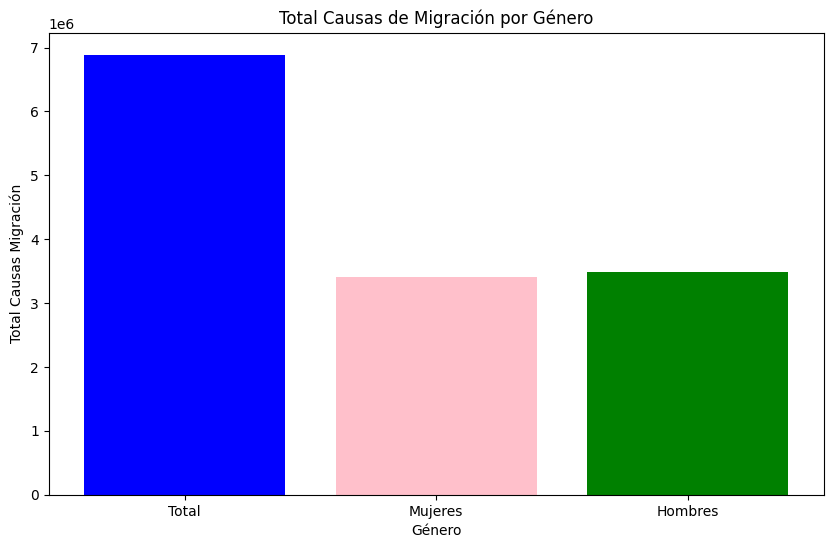

In [72]:
plt.figure(figsize=(10,6))
plt.bar(df_INEGI_merged['Género'], df_INEGI_merged['Total_Causas_Migración'], color=['blue', 'pink', 'green'])
plt.xlabel('Género')
plt.ylabel('Total Causas Migración')
plt.title('Total Causas de Migración por Género')
plt.show()